1. Preliminary data inspection and cleaning 
    a. Perform preliminary data inspection, checking for data types, missing values, and duplicates 
    b. Remove any columns that might not be relevant for the analysis 
2. Exploratory Data Analysis 
    a. Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country 
    b. Analyze the different aspects of the death events. 
    For example: 
        • What is the number of victims (deaths) in each accident? 
        • How many times did tesla drivers die? 
        • What is the proportion of events in which one or more occupants died? 
        • What is the distribution of events in which the vehicle hit a cyclist or a pedestrian? 
        • How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian? 
        • What is the frequency of Tesla colliding with other vehicles? 
    c. Study the event distribution across models 
    d. Check the distribution of verified Tesla autopilot deaths

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load the dataset
df = pd.read_csv("Tesla - Deaths.csv")

# Check for missing values and data types
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Case #                                                                294 non-null    float64
 1   Year                                                                  294 non-null    float64
 2   Date                                                                  294 non-null    object 
 3    Country                                                              294 non-null    object 
 4    State                                                                294 non-null    object 
 5    Description                                                          295 non-null    object 
 6    Deaths                                                               299 non-null    float64
 7  

In [55]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop irrelevant or mostly empty columns
columns_to_drop = [
    "Unnamed: 16", "Unnamed: 17", "Note", "Deceased 4"
]
df_cleaned = df.drop(columns=columns_to_drop)

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()

# Check missing values summary
missing_summary = df_cleaned.isnull().sum()

df_cleaned.shape, duplicates, missing_summary

((307, 20),
 4,
 Case #                                                                 13
 Year                                                                   13
 Date                                                                   13
 Country                                                                13
 State                                                                  13
 Description                                                            12
 Deaths                                                                  8
 Tesla driver                                                           13
 Tesla occupant                                                         17
 Other vehicle                                                          12
 Cyclists/ Peds                                                         11
 TSLA+cycl / peds                                                       10
 Model                                                                  11
 Autopilo

In [56]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Drop rows with missing critical fields
critical_fields = ["Case #", "Deaths", "Model"]
df_cleaned = df_cleaned.dropna(subset=critical_fields)

# Final shape after cleaning
df_cleaned.shape

(294, 20)

In [57]:
df["Tesla driver"] = pd.to_numeric(df["Tesla driver"], errors="coerce")
df["Tesla occupant"] = pd.to_numeric(df["Tesla occupant"], errors="coerce")
df["Model"] = pd.to_numeric(df["Model"], errors="coerce")
df["Verified Tesla Autopilot Deaths"] = pd.to_numeric(df["Verified Tesla Autopilot Deaths"], errors="coerce")

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores
# df.columns = df.columns.str.lower()  # Convert to lowercase for uniformity
print(df.columns)

Index(['Case_#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla_driver', 'Tesla_occupant', 'Other_vehicle', 'Cyclists/_Peds',
       'TSLA+cycl_/_peds', 'Model', 'Autopilot_claimed',
       'Verified_Tesla_Autopilot_Deaths',
       'Verified_Tesla_Autopilot_Deaths_+_All_Deaths_Reported_to_NHTSA_SGO',
       'Unnamed:_16', 'Unnamed:_17', 'Source', 'Note', 'Deceased_1',
       'Deceased_2', 'Deceased_3', 'Deceased_4'],
      dtype='object')


In [58]:
### Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country 

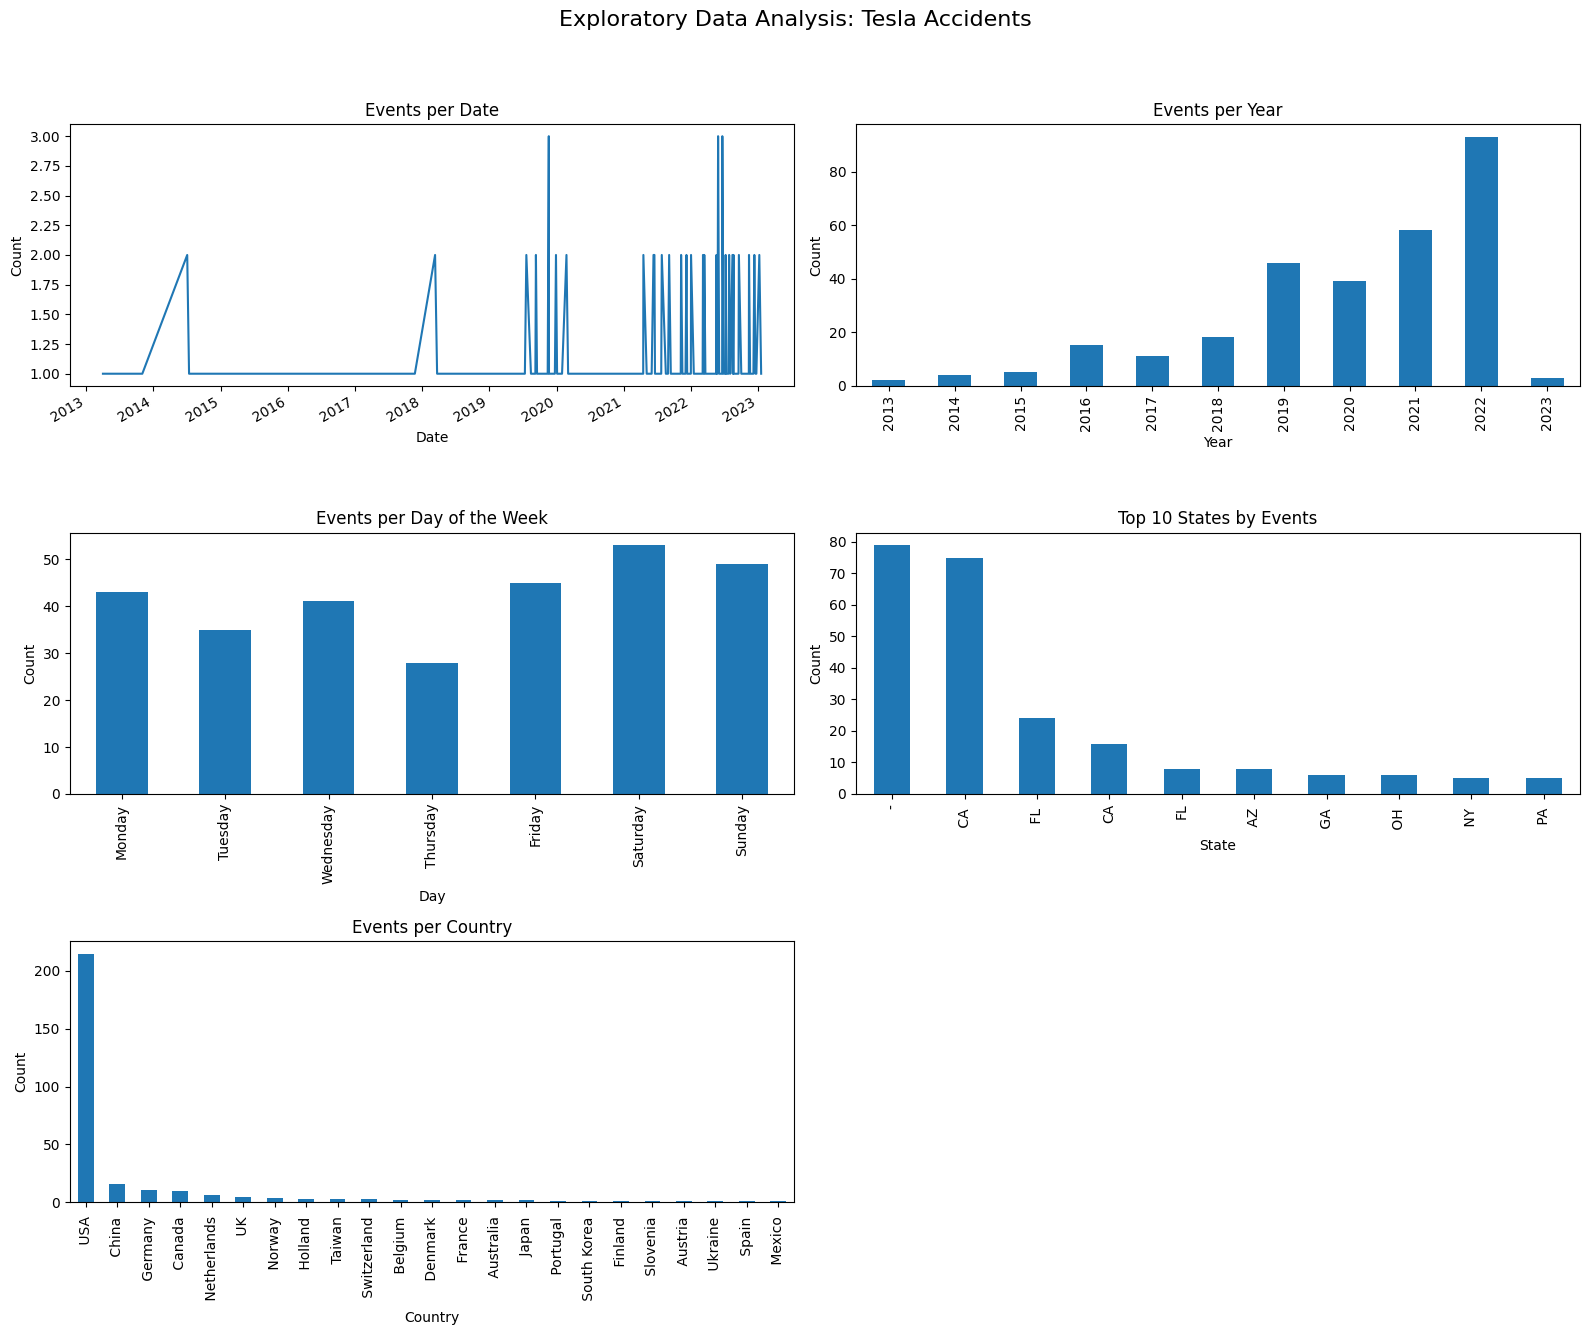

In [59]:
# Convert date and extract time-based features
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"], errors='coerce')
df_cleaned["Year"] = df_cleaned["Date"].dt.year
df_cleaned["Month"] = df_cleaned["Date"].dt.month
df_cleaned["DayOfWeek"] = df_cleaned["Date"].dt.day_name()

# Grouping data
events_per_date = df_cleaned["Date"].value_counts().sort_index()
events_per_year = df_cleaned["Year"].value_counts().sort_index()
events_per_day = df_cleaned["DayOfWeek"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
events_per_state = df_cleaned["State"].value_counts()
events_per_country = df_cleaned["Country"].value_counts()

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle("Exploratory Data Analysis: Tesla Accidents", fontsize=16)

# Events per date
events_per_date.plot(ax=axes[0, 0], title="Events per Date", xlabel="Date", ylabel="Count")

# Events per year
events_per_year.plot(kind="bar", ax=axes[0, 1], title="Events per Year", xlabel="Year", ylabel="Count")

# Events per day of the week
events_per_day.plot(kind="bar", ax=axes[1, 0], title="Events per Day of the Week", xlabel="Day", ylabel="Count")

# Events per state
events_per_state.head(10).plot(kind="bar", ax=axes[1, 1], title="Top 10 States by Events", xlabel="State", ylabel="Count")

# Events per country
events_per_country.plot(kind="bar", ax=axes[2, 0], title="Events per Country", xlabel="Country", ylabel="Count")

# Hide unused subplot
axes[2, 1].axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Analyze the different aspects of the death events. 
    For example: 
        • What is the number of victims (deaths) in each accident? 
        • How many times did tesla drivers die? 
        • What is the proportion of events in which one or more occupants died? 
        • What is the distribution of events in which the vehicle hit a cyclist or a pedestrian? 
        • How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian? 
        • What is the frequency of Tesla colliding with other vehicles? 

In [60]:
# Group accidents by Case # and count the deaths
deaths_per_accident = df.groupby("Case_#")["Deaths"].sum()
print(deaths_per_accident.describe())

count    294.000000
mean       1.200680
std        0.513171
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: Deaths, dtype: float64


In [61]:
# Count Tesla driver fatalities
tesla_driver_deaths = df[df["Tesla_driver"] > 0].shape[0]
print(f"Tesla driver fatalities: {tesla_driver_deaths}")

Tesla driver fatalities: 122


In [62]:
# Compute proportion of events with occupant deaths
occupant_death_events = df[df["Tesla_occupant"] > 0].shape[0]
total_events = df.shape[0]
print(f"Proportion of events with occupant deaths: {occupant_death_events / total_events:.2%}")

Proportion of events with occupant deaths: 15.64%


Total accidents involving cyclists or pedestrians: 49


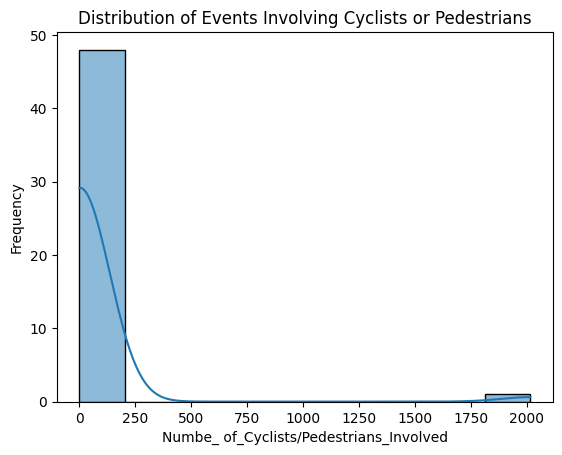

In [65]:
# Count accidents involving cyclists or pedestrians
df["Cyclists/_Peds"] = pd.to_numeric(df["Cyclists/_Peds"], errors="coerce")
cyclist_ped_events = df[df["Cyclists/_Peds"] > 0].shape[0]
print(f"Total accidents involving cyclists or pedestrians: {cyclist_ped_events}")

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df["Cyclists/_Peds"] > 0]["Cyclists/_Peds"], bins=10, kde=True)
plt.title("Distribution of Events Involving Cyclists or Pedestrians")
plt.xlabel("Numbe_ of_Cyclists/Pedestrians_Involved")
plt.ylabel("Frequency")
plt.show()

In [66]:
# Count occurrences of Tesla occupant/driver fatalities with cyclists/pedestrians
tesla_and_cyclist_ped_deaths = df[(df["Tesla_driver"] > 0) | (df["Tesla_occupant"] > 0) & (df["Cyclists/_Peds"] > 0)].shape[0]
print(f"Tesla occupant/driver and cyclist/pedestrian fatalities together: {tesla_and_cyclist_ped_deaths}")

Tesla occupant/driver and cyclist/pedestrian fatalities together: 123


Total Tesla collisions with other vehicles: 115


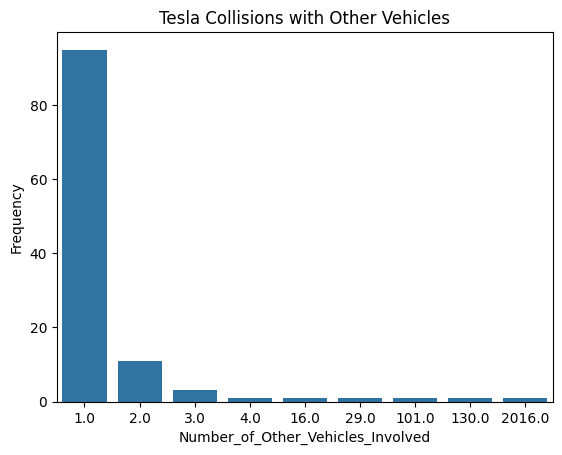

In [69]:
# Count accidents involving Tesla colliding with another vehicle
df["Other_vehicle"] = pd.to_numeric(df["Other_vehicle"], errors="coerce")
collision_events = df[df["Other_vehicle"] > 0].shape[0]
print(f"Total Tesla collisions with other vehicles: {collision_events}")

sns.countplot(data=df[df["Other_vehicle"] > 0], x="Other_vehicle")
plt.title("Tesla Collisions with Other Vehicles")
plt.xlabel("Number_of_Other_Vehicles_Involved")
plt.ylabel("Frequency")
plt.show()

### Study the event distribution across models 

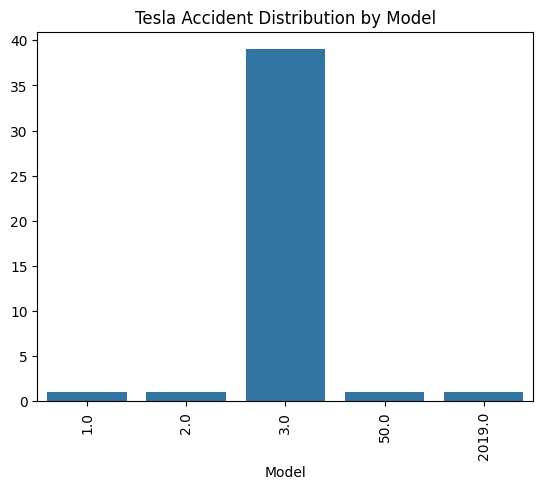

In [ ]:
# Count occurrences of each Tesla model in fatal accidents
model_distribution = df["Model"].value_counts()
sns.barplot(x=model_distribution.index, y=model_distribution.values)
plt.xticks(rotation=90)
plt.title("Tesla Accident Distribution by Model")
plt.show()

### Check the distribution of verified Tesla autopilot deaths

Verified Tesla Autopilot Deaths: 23


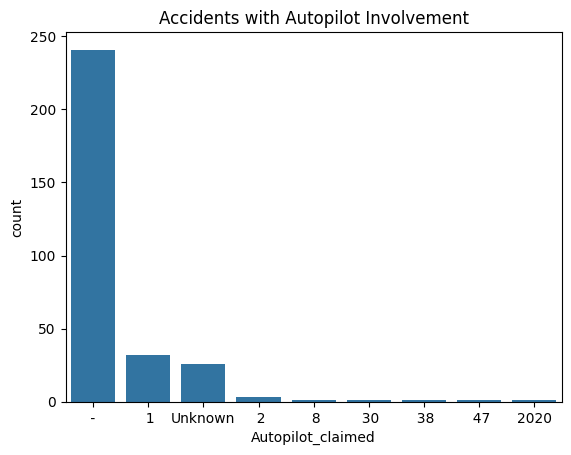

In [ ]:
# Verified Tesla autopilot deaths
autopilot_deaths = df[df["Verified_Tesla_Autopilot_Deaths"] > 0].shape[0]
print(f"Verified Tesla Autopilot Deaths: {autopilot_deaths}")

# Compare autopilot cases
df["Autopilot_claimed"] = df["Autopilot_claimed"].fillna("Unknown")
sns.countplot(data=df, x="Autopilot_claimed")
plt.title("Accidents with Autopilot Involvement")
plt.show()